<h1>Quantum Simulation and the Vlasov Equation</h1>

<i>Justin E. Elenewski (MIT-LL)</i> <b>:</b> <i>Code Revision 07/27/2022</i>

<h2> Distribution Statement </h2>

DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

<br>
This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

<br>
© 2022 Massachusetts Institute of Technology.

<br>
<br>
The software/firmware is provided to you on an As-Is basis

<br>
<br>
Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.

<h3>Summary</h3>

This notebook outlines a computational approach to the <i>Vlasov Equation</i> - which describes the time-dependent phase space distribution function for a plasma - using methods from quantum simulation. 


<h3>Introducing the Vlasov Equation</h3>

We begin our discussion in the context of a generic many-particle system.  Given this, our objective is to capture the  phase-space evolution associated with a single point particle.  These dynamics are  conveniently described by introducing a distribution function $f \equiv f(\mathbf{x},\mathbf{v},t)$ that reflects the probability $ f(\mathbf{x},\mathbf{v},t) \, d\mathbf{x} \, d\mathbf{v}$   of finding this particle within some infintesimal volume $d\mathbf{x} \, d\mathbf{v}$ of phase space. 


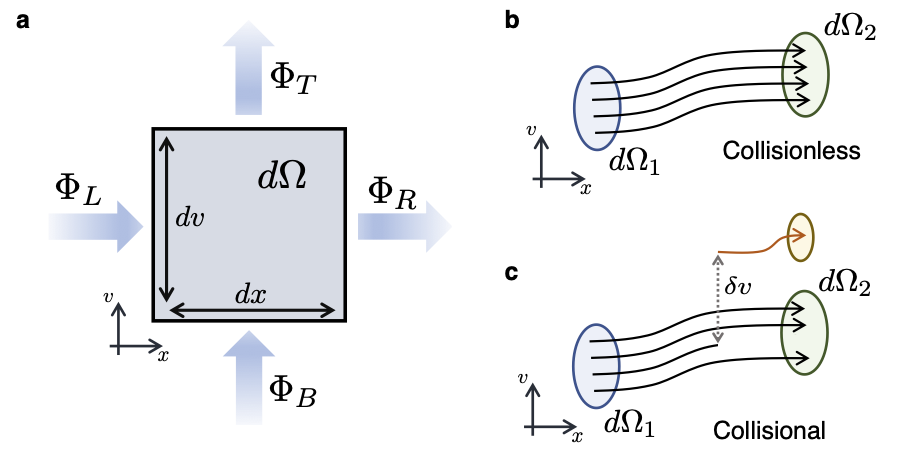

<b>Fig 1:</b> (a) Fluxes $\Phi_x$ through a two-dimensional subvolume of phase space $d\Omega$ (note the sign convention); (b) Collisionless evolution along a phase space trajectory gives a volume-preserving mapping, consistent with Hamiltonian (symplectic) dynamics; (c) Collisional processes lead to discontinuous phase-space trajectories for a given particle.


By calculating the particle flux through a two-dimensional subvolume of phase space (Fig. 1a), we can obtain a straightforward expression for the time derivative ot this distribution,

\begin{align}
\frac{\partial}{\partial t} f(x,v,t) \, dx,dv  =& \Phi_L + \Phi_B - \Phi_T - \Phi_R \\
= & f(x,v,t)\,v\,dv + f(x,v,t)\,a(x,v+dv,t)\,dx \\
   & - f(x,v+dv,t) \,a(x,v+dv,t)\,dx \\
   & - f(x+dx,v,t)\,v \,dv.
\end{align}

In writing this expression, we have used $\mathbf{a}$ to denote the particle's acceleration and noted that horizontal and vertical fluxes at some point $(\mathbf{x},\mathbf{v})$ are given by $f(\mathbf{x},\mathbf{v},t) \mathbf{v}$ and $f(\mathbf{x},\mathbf{v},t)\,a(\mathbf{x},\mathbf{v},t)$, respectively. If we repeat this analysis for different faces a 6-$d$ phase space volume, perform a Taylor expansion, and rewrite the result finite-difference form, it is straightforward to derive a differential evolution equation for the continuum limit,

    
\begin{equation}
    \frac{\partial f}{\partial t} + \mathbf{v} \cdot \frac{\partial f}{\partial \mathbf{x}} + \frac{\partial}{\partial \mathbf{v}} \cdot [\mathbf{a} f] = 0,
\end{equation}

where $\mathbf{v}$ and $\mathbf{a}$ are the velocity and acceleration along a given phase space trajectory, respectively.  For now, we have assumed that the particles are collisionless and thus that the distribution within a given volume element is indepdent of time (Fig. 1b).  This is certainly not true when collisions are present (Fig 1c).  Nonetheless, even as written above, this expression represents one limit of a  generic Liouville equation for non-Hamiltonian systems. 

To develop this problem further, we must specify the forces $\mathbf{a} = m^{-1}\mathbf{F}(\mathbf{x},\mathbf{v})$ which act on our particle of interest.  These may arise from mean-field interactions between different components of the system or from externally applied fields.  We will restrict ourselves to Hamiltonian systems for the time being, and thus we neglect contributions from velocity-dependent forces by setting $\partial_\mathbf{v} \cdot \mathbf{a} = 0$.  After making this accommodation, we arrive at the <i>collisionless Boltzmann equation</i>:


\begin{equation}
    \frac{\partial f}{\partial t} + \mathbf{v} \cdot \frac{\partial f}{\partial \mathbf{x}} +  \mathbf{a} \cdot \frac{\partial f}{\partial \mathbf{v}} = 0.
\end{equation}

Our discussion can be made even more precise in light of the system's constituents and their interactions.  Since we are interested in plasmas, the underlying particles will be a mixture of positively charged  (ions) and negatively charged (free electrons) components, which couple to each other through the associated electric $\mathbf{E}$ and magnetic $\mathbf{B}$ field distributions.  This takes the form of a Lorentz force $\mathbf{F} = m\mathbf{a} = q(\mathbf{E} + \mathbf{v} \times \mathbf{B})$ and gives rise to the <i>Vlasov-Maxwell</i> equation for a single particle:


\begin{equation}
     \frac{\partial f}{\partial t} + \mathbf{v} \cdot \frac{\partial f}{\partial \mathbf{x}} + \frac{q}{m}(\mathbf{E} + \mathbf{v} \times \mathbf{B}) \cdot \frac{\partial f}{\partial \mathbf{v}} = 0.
\end{equation} 

While a velocity term does appear in this equation, the evolution remains Hamiltonian since the $i$-th component of the cross-product is independent of the $i$-th velocity, $(\mathbf{v} \times \mathbf{B})_i = v_j B_k - v_k B_k$. Note that this must be solved in conjunction with Maxwell's equations to give a closed system:
    
\begin{align}
    \frac{\partial \mathbf{E}}{\partial t} &= c\nabla \times \mathbf{B} + \int \mathbf{v} f \cdot d\mathbf{v}, \\
    \frac{\partial \mathbf{B}}{\partial t} &= -c\nabla \times \mathbf{E}.
\end{align}
    
    




<h3>Detailed Considerations</h3>

When interpreted as a differential operator, the Vlasov equation corresponds to a stationary condition for the total derivative of $f$.  In fact, this operator is a generalization of the convective (or material / advective) derivative that appears in Eulerian and Lagrangian formulations of continuum hydrodynamics:

\begin{equation}
D \cdot f = \Big(\frac{\partial }{\partial t} + \mathbf{v} \cdot \frac{\partial }{\partial \mathbf{x}} +  \mathbf{a} \cdot \frac{\partial }{\partial \mathbf{v}} \Big) \cdot  f.
\end{equation}

Moreover, the condition that $Df = 0$ along a given trajectory implies that some quantity (e.g., energy, momentum, etc. depending on the physical context) is also  conserved along this trajectory.  Stated conversely, conserved quantities are assocaited with  phase-space orbits on which the distribution function $f$ remains constant. 

As constructed, the  distribution function $f(\mathbf{x},\mathbf{v},t)$ is defined for each particle in the system, and thus requires us to work with the phase-space coordinates for each constituent (and $6N$ total parameters).  Going forward, we will redefine/reinterpret $f$ as an integrated distribution function $f \mapsto \langle f_\alpha \rangle = \Omega^{-1} \int_\Omega d\mathbf{v} \, d\mathbf{x} \, f_\alpha (\mathbf{x},\mathbf{v},t)$ that captures the average number of particles of species $\alpha$ (either electrons or different types / charges of ions) within some  volume $\Omega$ of phase space.  Note that this requires the definition of a different mean-field potential - or potential of mean force - for each individual species. After adopting this perspective, the distribution function $f$ can be used to calculate  weighted particle velocities
    
\begin{equation}
       \mathbf{u}(\mathbf{x},t) = \int \mathbf{v} f \cdot d\mathbf{v},
\end{equation}
    
local densities,
    
\begin{equation}
       \rho(\mathbf{x},t) = \int  f \cdot d\mathbf{v},
\end{equation}
    
and mean velocities $\bar{\mathbf{u}} =  \rho^{-1}\mathbf{u}$.   




<h3>Collisional Limits</h3>

The Vlasov-Maxwell system gives an robust description of plasmas when they are governed by a collisionless, mean-field effetive potential $\mathbf{a} = \langle m^{-1} \nabla U(\mathbf{x})\rangle$.  However, explicit collisions lead to discontinuous phase-space trajectories (e.g., a jump in $\mathbf{v}$ at constant $\mathbf{x}$ for a perfectly inelastic collision), which we  excluded by construction.  We can extend this to a collisional mean-field limit where the abrupt velocity changes - and small position changes - that are associated with grazing collisions are captured using a <i>collision operator</i> $C_{\alpha\beta}(f_\alpha)$ which describes the scattering of the species $\alpha$ in the plasma (for instance, the electrons) by a second species $\beta$ (such as the ions).  This gives us the full <i>collisional Vlasov-Maxwell</i> equation:

\begin{equation}
     \frac{\partial f_\alpha}{\partial t} + \mathbf{v} \cdot \frac{\partial f_\alpha}{\partial \mathbf{x}} + \frac{q}{m}(\mathbf{E} + \mathbf{v} \times \mathbf{B}) \cdot \frac{\partial f_\alpha}{\partial \mathbf{v}} = C_{\alpha\beta}(f_\alpha).
\end{equation}
    
From a phase space perspective, this collisional term amounts to a source/sink that annihilates particles at a given $\mathbf{v}$ while creating them at a different $\mathbf{v}$ (at constant $\mathbf{x}$; see Fig. 1c). 



<h3>Solving the Vlasov-Maxwell System</h3>

Solving the coupled <i>Vlasov-Maxwell</i> system can become a daunting task.  Nonetheless, this complexity can be reduced if we make a few general (and permissive) approximations.  We begin by taking a limit where the volume density of ions is comparable to that of the  lighter and more mobile electrons.  Under these conditions, ionic distribution is well-approximated by a stationary, positively charged Maxwellian background,

<!-- \begin{equation} 
f_M = (m/2\pi k_B T)^{3/2}\exp[-mv^2/2k_bT],
\end{equation} 
 -->
\begin{equation} 
f_M (v) = \Big(\frac{m_i}{2\pi k_B T_i}\Big)^{3/2} e^{-m_i v^2 / 2k_B T_i},
\end{equation} 


where $m_i$ is the ionic mass, $k_B$ is Boltzmann's constant and $T_i$ is the ion (kinetic) temperature.  Furthermore, we can consider small-wave perturbations of the ionized electrons around a stationary distribution $f = f_0 + f_1$, subtract off the equilibrium solution, and retain terms up to first order in the perturbation to give a linearized Vlasov equation:

\begin{equation}
 \frac{\partial f_1}{\partial t} + \mathbf{v} \cdot \frac{\partial f_1}{\partial \mathbf{x}} + \frac{e}{m}\Big[\mathbf{E} \cdot \mathbf{v} f_M - (\mathbf{v} \times \mathbf{B}) \cdot \frac{\partial f_1}{\partial \mathbf{v}} \Big]  = \nu C_{}(f).
\end{equation}

In writing this expression, we have also assumed that the collision operator can be written in terms of a single collision frequency $\nu$.  To make this linearized Vlasov-Maxwell system tractable, a conventional approach is to expand the spatial variation of all quantities in terms of Fourier modes $\exp[ikx]$, which gives:

\begin{align}
\frac{\partial \tilde{f}_1}{\partial t} + \imath \mathbf{k} \cdot \mathbf{v} \tilde{f}_1 + \mathbf{\tilde{E}} \cdot \mathbf{v} \tilde{f}_M - \tilde{c}^{-1} (\mathbf{v} \times \mathbf{B}_0) \cdot \frac{\partial \tilde{f}_1}{\partial \mathbf{v}} = \nu C_{}(\tilde{f}_1) \\
\frac{\partial \tilde{\mathbf{E}}}{\partial t} = -\imath \tilde{c}^{-1} \mathbf{k} \times \tilde{\mathbf{B}} + \int \mathbf{v} \tilde{f}_1 \cdot d\mathbf{v} \\
\frac{\partial \tilde{\mathbf{B}}}{\partial t} = -\imath \tilde{c}^{-1} \mathbf{k} \times \tilde{\mathbf{E}}
\end{align}

where we implicitly use reduced units (e.g., defined in terms of the Debye wavelength $\lambda_D$, electronic plasma frequency $\omega_p$, electronic temperature $T_e$, the thermal velocity distribution, etc.) that give the speed of light in the plasma as $\tilde{c} = c (\lambda_D \omega_e)^{-1}$ and write a tilde for Fourier transformed quantities. 




<h4><u>One-Dimensional Vlasov and Vlasov-Poission Systems</u></h4>

The preceding spectral expansion is a canonical starting point for many numerical treatments of the Vlasov-Maxwell system.  Nonetheless, we will go one step further and work in the  electrostatic limit ($\mathbf{B} = 0$) to give the <i>Vlasov-Poisson</i> problem,

<!-- \begin{align}
 \frac{\partial f_1}{\partial t} + \mathbf{v} \cdot \frac{\partial f_1}{\partial \mathbf{x}} + \frac{e}{m}\mathbf{E} \cdot \mathbf{v} f_M  &= \nu C_{}(f_1) \\
\mathbf{E}(\mathbf{x}) &= -\nabla \phi(\mathbf{x}) \\
\nabla^2 \phi(\mathbf{x}) &= -\rho(\mathbf{x}),
\end{align} -->

\begin{align}
 \frac{\partial f_1}{\partial t} + \mathbf{v} \cdot \frac{\partial f_1}{\partial \mathbf{x}} + \mathbf{E} \cdot \mathbf{v} f_M  &= \nu C_{}(f_1) \\
\mathbf{E}(\mathbf{x}) &= -\nabla \phi(\mathbf{x}) \\
\nabla^2 \phi(\mathbf{x}) &= -\rho(\mathbf{x}),
\end{align}

where $\phi(\mathbf{x})$ is the electrostatic potential.  If the symmetries of a given application permit, we can also work with a reducted distribution function $ \int d^2 v \, f_1(\mathbf{x},\mathbf{v},t) \mapsto f(x,v,t)$ that is parameterized by one spatial and one temporal dimension:

<!-- \begin{align}
 \frac{\partial f }{\partial t} + v  \frac{\partial f}{\partial z} + 
 \frac{eE}{m}\Big[v f_M + \underbrace{ \frac{\partial f}{\partial v}}_{nonlinear \rightarrow 0} \Big] &= \nu C_{}(f) \\
E &= -\frac{\partial \phi}{\partial z} \\
\frac{\partial^2 \phi}{\partial z^2} &= \int_{-\infty}^{\infty} dv \cdot f 
\end{align} -->

\begin{align}
 \frac{\partial f }{\partial t} + v  \frac{\partial f}{\partial z} + 
 E\Big[v f_M + \underbrace{ \frac{\partial f}{\partial v}}_{nonlinear \rightarrow 0} \Big] &= \nu C_{}(f) \\
E &= -\frac{\partial \phi}{\partial z} \\
\frac{\partial^2 \phi}{\partial z^2} &= \int_{-\infty}^{\infty} dv \cdot f 
\end{align}

with overall charge neutrality so that $\int_0^D dz \int_{-\infty}^\infty dv f(z,v,t) = 0$ and $f_M = \pi^{-1/2} e^{-v^2}$.  Here we have included a nonlinear contribution that we previously neglected and denoted it with an underbrace.  While we will take this term to be zero for the time being, it is helpful to note its presence for later discussions.


There are two distincit paths to constructing an effective Hamiltonian operator for this system.  In either case, we will consider the electrostatic case ($\mathbf{B} = 0$), which gives us an effective, 1+1-dimensional system where only the $E_z$ component is nonzero (the choice of $z$ as our spatial coordinate is an arbitrary yet standard convention).  Of these two, we will only work from the dual-spectral approach.




<h4><u>Dual Spectral Representation: The Fourier-Hermite Solution</u></h4>

The Fourier approach to the linearized Vlasov system uses a spectral representation of the spatial components of the distribution function $f(z,v,t)$.  It can be advantageous to do the same for the velocity component, albeit using a different set of orthogonal functions as a basis.  One such approach expands the velocity components in terms of Hermite polynomials,

<!-- 
\begin{align}
H_m (v) &= (-1)^m e^{v^2} \frac{d^m}{dv^m} \big(e^{-v^2}\big) \\
\zeta^m (v) &= \frac{1}{\sqrt{2^m m!}} H_m(v),
\end{align}
 -->
\begin{align}
\zeta^m (v) = \frac{1}{\sqrt{2^m m!}} H_m(v)  & \hspace{10pt}&
H_m (v) = (-1)^m e^{v^2} \frac{d^m}{dv^m} \big(e^{-v^2}\big),
\end{align}

where $m \in \mathbb{N}$.  These functions form an orthonormal basis with respect to the Maxwell-Boltzmann distribution weight $f_M = \pi^{-1/2} e^{-v^2}$ with a dual space spanned by the functions,

\begin{equation}
\zeta_m(v) = \frac{e^{-v^2}}{\sqrt{\pi}} \zeta^m (v),
\end{equation}

and an associated $\mathbb{L}^2$ inner product,

\begin{equation}
\int_{-\infty}^\infty dv \, \zeta_n (v) \cdot \zeta^m (v) = \delta_{nm}.
\end{equation}

By introducing this convention, we may expand the distribution function $f$ in a straghtforward manner

\begin{equation}
f(z,v,t) = \sum_{m=0}^{\infty} \sum_{j = -N_f}^{N_f} g_{jm}(t) \, \zeta_m(v) \, e^{ik_j z},
\end{equation}

where we  isolate and expand the velocity component directly,

<!-- \begin{align}
f(v) &= \sum_{m=0}^\infty g_m \zeta_m (v) \Longrightarrow \sum_{m=0}^{N_m -1} g_m \zeta_m (v) \\
a_m  &= \int_{-\infty}^\infty dv \, f(v) \zeta^m (v).
\end{align}
 -->


\begin{align}
f(v) = \sum_{m=0}^\infty g_m \zeta_m (v) \Longrightarrow \sum_{m=0}^{N_m -1} g_m \zeta_m (v), & \hspace{20pt} \text{with} \hspace{15pt} & a_m  = \int_{-\infty}^\infty dv \, f(v) \zeta^m (v).
\end{align}

This sum is truncated after $N_m$ terms for computational purposes, with the net effect of defining a cutoff scale for velocity components.  Applying this expansion to the 1+1-d collisional Vlasov-Poisson system gives a coupled linear system

\begin{equation}
\frac{d}{dt} g_{j,m} + \imath k_j \Big( \sqrt{\frac{m+1}{2}} g_{j,m+1} + \sqrt{\frac{m}{2}} g_{k,m-1}\Big) + \sqrt{2}E_j \delta_{m,1} = \nu \mathcal{C}_{j,m}
\end{equation}

where the electric field terms ($E_j = -\imath k_j \phi_j$ and $-k_j^2 \phi_j = a_{j,0}$) are combined to give $ E_j = \imath \frac{g_{j,0}}{k_j}$.  We note for completeness that the general (un-linearized) representation of this problem includes a nonlinear contribution

\begin{equation}
\mathcal{N}_{jm} = \sqrt{2m} \sum_{j' = N_f}^{N_f} E_{j'} \, g_{j-j',m-1}
\end{equation}

on the left hand side of each term in the expansion above and an explicit representation

\begin{equation}
\mathcal{C}_{j,m} = \frac{1}{L} \int_{-\infty}^\infty \int_0^L dv \, dz \, e^{-ik_j z}
\, \zeta^m (v) \, \nu C(f)
\end{equation}

for the collisional operator.

<h2>Correspondence with Hamiltonian Simulation.</h2>

The Hermite-Fourier expansion of the Vlasov equation gives a linear system that may be solved to give its velocity components.  Moreover, this approach is amenable to an algorithmic treatment that uses methods from quantum simulation. To begin, we may approximate the collision term using the well-established Lenard-Bernstein ansatz $\nu C_{j,m} = -\nu m$ and vectorize $g_{j,m}$ to give a matrix representation of the linear system,

\begin{equation}
\dot{\mathbf{g}}(t) = \mathbf{A} \cdot \mathbf{g}(t),
\end{equation}

where,

\begin{equation}
\mathbf{A} = -\begin{pmatrix} 0 & \imath k\frac{1}{\sqrt{2}}   & 0 & 0 & 0 & \dots \\
              \imath k\frac{1+\alpha}{\sqrt{2}} & 0 & \imath k & 0 & 0  & \dots \\
              0 & \imath k\sqrt{\frac{m_2}{2}} & \nu m_2 & \imath k\sqrt{\frac{m_2 + 1}{2}} & 0 & \dots \\
              0 & 0 & \imath k\sqrt{\frac{m_3}{2}} & \nu m_3 & \imath k\sqrt{\frac{m_3 + 1}{2}} & \dots \\
              \vdots & \vdots & \vdots & \ddots & \ddots & \ddots \\
              0 & 0 & 0 & \imath k\sqrt{\frac{m_{d-1}}{2}} & \nu m_{d-1} & \imath k\sqrt{\frac{m_{d-1} + 1}{2}}  \\
              0 & 0 & 0 & 0 & \imath k\sqrt{\frac{m_{d}}{2}} & \nu m_{d}   
              \end{pmatrix}
\end{equation}.

where $\alpha = \sqrt{2}/k_1$.  Nonetheless, it is often convienient to start with  a representation where $\phi = \alpha \int_{-\infty}^\infty dv \, f$, as widely utilized in several standard numerical packages.  The matrix $-\imath \mathbf{A}$ is manifestly non-Hermitian due to both the imaginary diagonal entries and an asymmetry when $\alpha = 0$.  While the first part is a persistent complication whenever $\nu \neq 0$ (e.g., when the Vlasov system is collisional) the second issue is straightforward to resolve using a trivial change of variables $g_{j,0} \mapsto g'_{j,0} = g_{j,0} $ and $g_{j,m} \mapsto g_{j,m}' = g_{j,m} / \sqrt{1+\alpha} $.  This gives a modified system 

\begin{equation}
\dot{\mathbf{g}'}(t) = \mathbf{A}' \cdot \mathbf{g}'(t)
\end{equation}

and

$$\mathbf{A}' = -\begin{pmatrix} 0 & \imath k\sqrt{\frac{1+\alpha}{2}}   & 0 & 0 & 0 & \dots \\
              \imath k\sqrt{\frac{1+\alpha}{2}} & 0 & \imath k & 0 & 0  & \dots \\
              0 & \imath k & 2\nu & \imath k\sqrt{\frac{3}{2}} & 0 & \dots \\
              0 & 0 & \imath k\sqrt{\frac{3}{2}} & 3\nu & \imath k\sqrt{\frac{4}{2}} & \dots \\
              \vdots & \vdots & \vdots & \ddots & \ddots & \ddots \\
              0 & 0 & 0 & \imath k\sqrt{\frac{N-3}{2}} & (N-2)\nu & \imath k\sqrt{\frac{N-2}{2}}  \\
              0 & 0 & 0 & 0 & \imath k\sqrt{\frac{N-2}{2}} &  (N-1)\nu   
              \end{pmatrix}$$.


The formal solution 

\begin{equation} 
\frac{d \mathbf{g}_k}{dt} = \mathbf{A} \cdot \mathbf{g}_k \hspace{10pt} \Longrightarrow \hspace{10pt} \mathbf{g}_k(t) = e^{\mathbf{A} t} g_k (0) 
\end{equation}

then maps to the time-dependent Schrodinger equation

\begin{equation}
\partial_t \vert\psi(t)\rangle = -\imath H_V t \vert\psi(t)\rangle
\end{equation}

with $H_V = \imath\mathbf{A}$ including a (partial) imaginary time evolution when $\nu \neq 0$.


<h2>Encoding and Simulation of the Vlasov-Poisson Hamiltonian.</h2>

<u><h3>Encoding</h3></u>

The tridiagonal Hamiltonian $H_V$ may be rewritten for quantum algorithms by introducing a set of basis states $\mid i\rangle$, thereby giving a   system that (superficially) resembles a tight-binding Hamiltonian,

\begin{equation}
H_V = \sum_{m=0}^{N-2} \sqrt{\frac{1 + m + \alpha\, \delta_{m,0}}{2}} \big(| m \rangle\langle m+1 | + | m+1 \rangle\langle m| \big)  - \imath \nu \sum_{m=2}^{N-1} m \, |m\rangle\langle m|.
\end{equation}

Here, "hopping" terms are associated with the off-diagonal bands, while imaginary relaxation terms give an "on-site" contribution along the diagonal.  We can map this Hamiltonian to its second-quantized counterpart by introducing the Fermionic creation and annihilation operators $c_m^\dagger, c_m$ to find,


\begin{equation}
H_V = \sum_{m=0}^{N-2} \sqrt{\frac{1 + m + \alpha\, \delta_{m,0}}{2}} \big(c^\dagger_m c_{m+1} + c^\dagger_{m+1} c_m \big)  - \imath \nu \sum_{m=2}^{N-1} m \, c^\dagger_m c_m,
\end{equation}

which is manifestly a quadratic Hamiltonian.  To implement this on gate-based architectures, the $N$-site fermionic problem may be mapped to an $N$-qubit/spin system using the Jordan-Wigner transformation:

\begin{align}
c_m         & = \Big( \bigotimes_{i=0}^{m-1} Z_i \Big) \otimes \Big( \frac{X_m - \imath Y_m}{2} \Big)\otimes \Big( \bigotimes_{m+1}^{N-1} I_i \Big)\\
c_m^\dagger         & = \Big( \bigotimes_{i=0}^{m-1} Z_i \Big) \otimes \Big( \frac{X_m + \imath Y_m}{2} \Big)\otimes \Big( \bigotimes_{m+1}^{N-1} I_i \Big)\\
c_m^\dagger c_m &= \frac{I+Z_m}{2}
\end{align}

where $X, Y, Z, I$ are the Pauli matrices and the identity operator, respectively.  Since all operators composing $c_m, c_m^\dagger$ commute,  we may keep the same order for the $Z$ strings and obtain a very simple expression:

\begin{equation}
H_V = \frac{1}{2} \sum_{m=0}^{N-2} \sqrt{\frac{1 + m + \alpha \delta_{m,0}}{2}} \big(X_m X_{m+1} + Y_m Y_{m+1} \big)  - \imath \nu \sum_{m=2}^{N-1} m \Big(\frac{I+Z_m}{2}\Big).
\end{equation}

This defines an $XY$ model Hamiltonian with an imaginary $Z$-field, and is a direct encoding of the Vlasov transport problem in terms of qubits.  Since the $g_{j,m}$ terms are given by the $m$-th fermionic amplitude, it is sufficient to extract these components by measuring the operator $\mathcal{O}_m = (Z_m + 1)/2 $ for each site so that $g_{j,m} = \langle \psi|\mathcal{O}_m|\psi\rangle$.



<u><h3>Quantum Simulation</h3></u>

<h4>Correlation Matrix Propagation</h4>

<h2>MODIFY TO INCLUDE CASE OF NON-HERMITIAN H</h2>

<p>Since we are interested in (Gaussian) states associated with the quadratic operator $H_V$, this system will be completely determined by the expectation values of two-point correlators.  It is then sufficient to consider an evolution for the correlation matrix,

\begin{equation}
\mathcal{C}_{i,j} = \langle c^\dagger_i c_j\rangle = \text{Tr}[c^\dagger_i c_j \rho],
\end{equation} 

as a numerical implementation of this quantum simulation problem on classical hardware.  It is straightforward to show that this evolution is analogous to the Liouville-von Neumann equation for a density matrix,

\begin{equation}
\frac{\partial \rho}{\partial t} = -\imath [H,\rho] \Longleftrightarrow \frac{\partial \mathcal{C}}{\partial t} = -\imath [H,\mathcal{C}].
\end{equation}

This has a straightforward extension for simple non-Hermitian Hamiltonians with $H = H_R + \imath H_I$ so that,
    
\begin{equation}
 \frac{\partial \mathcal{C}}{\partial t} = -\imath [H_R,\mathcal{C}]+ \{H_I,\mathcal{C}\},
\end{equation}
    
and the bilnear bracket $\{\cdot,\cdot\}$ is an anticommutator. Framed in this way, the $2^N \times 2^N$ parameters required for a density matrix evolution are reduced to an $N^2$ polynomial scaling.   The terms along $\text{diag}\,\mathcal{C}$ then represent the observables (amplitudes) of interest to the Vlasov-Poission problem. While custom integration schemes can be used, standard ODEPACK routines such as LSODA are  sufficient to implement this problem.

We begin our demonstration for an $N$-component Hermite expansion with a single Fourier mode $k$ with collisional relaxation frequency $\nu$ and effective electric field parameter $\alpha$:

In [1]:

import time

import numpy             as np
import numpy.linalg      as la
import scipy.linalg      as sla
import scipy.integrate   as spi
import matplotlib.pyplot as plt

import vlasovsim         as vs                 # Module containing Vlasov-Poisson 
                                               # simulation methods

np.set_printoptions(precision=2)


In [2]:

N      =  8                                    # Number of terms in the Vlasov-Hermite 
                                               # expansion

k      =  2.0                                  # Fourier wavenumber

nu     =  0.01                                 # Collisional damping parameter

alpha  =  0.6                                  # Electric field parameter

dt     =  0.01                                 # Integration timestep
tmax   =  16.00                                # Maximal timestep
sclf   =  1                                    # Scale factor for timestep sampling
Ns     =  int(np.ceil(tmax/dt))                # Total number of timesteps


The `vlasovsim` package has routines that contruct a Hamiltonian encoding for the linear system associated with the Vlasov-Hermite expansion.  In doing so, we create a matrix that is identical to the classical linear system, which may be evolved by propagating the correlation matrix for an analogous gaussian Fermionic state via the Liouville-von Neumann equation:

In [3]:

H      = vs.hamiltonian_cm_vlasov_hermite_linear_sym(k,alpha,nu,N)


We must then create the initial correlation matrix for the Fermionic system.  Here, the initial mode amplitudes for the Vlasov-Hermite system are encoded as elements of the correlation matrix:

In [4]:
def calcInitCMOcc(occs):
    
    N  = len(occs)
    TG = np.zeros((N,N))
    
    nrv = la.norm(occs)
    
    for j in range(N):
        for k in range(N):
            if ((occs[k] == 1) and (occs[j]==0) and (np.abs(j-k) <= 1)):
                TG[j,k] = 1.0/(nrv**4)
            else:
                TG[j,k] = 0
    
    for j in range(N):
        TG[j,j] = occs[j]/nrv**2
        
    return(TG)

#CMi       = CMi.T / la.norm(occ_state)**2


In [122]:

#occ_state = np.array([(j+1) % 2 for j in range(N)])      # Define amplitudes

occ_state    = np.zeros(N)
occ_state[0] = 1

# occ_state[3] = 1
# occ_state[5] = 1


occ_ampls = occ_state / la.norm(occ_state)


CMi       = np.outer(occ_ampls,occ_ampls)     # Create initial correlation matrix


CMp       = vs.vectorize_cmat(CMi)            # Vectorize for use with ODEPACK
                                              # solvers.

CMi

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [123]:

timestep_vec = np.arange(0,tmax+dt,sclf*dt)             # Define array of timesteps


Next, we propagate the Liouville-von Neumann system (with derivative given by the routine `vs.prop_lvn`) for the Hamiltonian `H` using the initial correlation matrix `CMp` and sample at the timesteps set contained in `timestep_vec`:

In [124]:

traj_raw_cm = spi.odeint(vs.prop_lvn,CMp,timestep_vec,args=(H,),atol=1.0e-16)


Process the raw trajectory `traj_raw` - where each point in the timeseries is a complex-valued correlation matrix - to extract the diagonal elements:

In [125]:

traj_proc_cm = vs.parse_cm_traj(timestep_vec,traj_raw_cm)


Print some selected timepoints and plot the propagation:

In [126]:

for j in range(traj_proc_cm.shape[0]):
   if ( (j % 100) == 0 ):
       print(traj_proc_cm[j,0].real, " ", traj_proc_cm[j,1:8].real)
        

0.0   [1. 0. 0. 0. 0. 0. 0.]
1.0   [0.01 0.23 0.32 0.24 0.12 0.05 0.02]
2.0   [0.   0.01 0.02 0.02 0.01 0.28 0.01]
3.0   [0.12 0.23 0.29 0.11 0.06 0.   0.01]
4.0   [6.68e-01 1.14e-01 9.79e-06 2.65e-02 8.74e-06 1.06e-02 2.18e-04]
5.0   [0.04 0.08 0.15 0.22 0.1  0.13 0.02]
6.0   [0.02 0.   0.12 0.01 0.11 0.15 0.04]
7.0   [0.25 0.14 0.18 0.02 0.01 0.02 0.  ]
8.0   [2.64e-01 3.02e-01 1.23e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]
9.0   [0.14 0.01 0.03 0.16 0.04 0.15 0.01]
10.0   [3.39e-02 7.16e-05 1.96e-01 1.01e-04 1.97e-01 3.74e-02 5.67e-02]
11.0   [0.28 0.04 0.07 0.   0.   0.06 0.  ]
12.0   [2.85e-02 3.78e-01 9.36e-05 9.37e-02 2.82e-03 2.59e-02 2.76e-03]
13.0   [0.21 0.02 0.   0.07 0.01 0.11 0.  ]
14.0   [0.04 0.   0.19 0.   0.2  0.   0.06]
15.0   [0.21 0.   0.01 0.03 0.02 0.08 0.02]
16.0   [0.02 0.3  0.   0.07 0.01 0.02 0.  ]


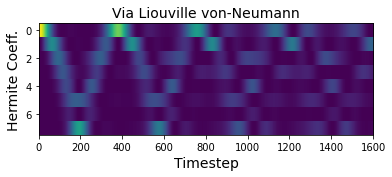

In [127]:
plt.imshow(np.transpose(traj_proc_cm[:,1:(N+1)].real),cmap='viridis', interpolation='nearest',
           aspect=Ns/(3*N))
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Hermite Coeff.',fontsize=14)
plt.title('Via Liouville von-Neumann',fontsize=14)
plt.show()

<h4>Wavefunction-Based Propagation</h4>

While numerically efficient and descriptive of the underlying physics, the correlation matrix evolution does not give access to the associated wavefunction.   If this is desired, we can process the same evolution by mapping the Fermionic system to spins (qubits) using the Jordan-Wigner transformation.  In this case, we first build the $2^N \times 2^N$ Hamiltonian corresponding to the spin system:

In [128]:

HP  = vs.hamiltonian_wfn_vlasov_hermite_linear_sym(k,alpha,nu,N)


<!-- And build the intial statevector from an alternating product state of up and down spins (or, alternatively, $|0\rangle$ and $|1\rangle$ basis states for each qubit).  We also vectorize the wavefunction for ODEPACK: -->

The initial statevector is then constructed as a superposition of states associated with the specified amplitude set (i.e., Fermionic site occupations):

In [129]:

wfn = 0j


for j in range(N):
    if (occ_state[j] == 1):
        wfn += vs.state_multifermi_idx((j,),N)

wfn = wfn / la.norm(wfn)

wfnp = vs.vectorize_cvec(wfn)


We can convince ourselves that this corresponds to the same set of amplitudes as before by measuring the expectation value of $P_{z,+} = (I + Z)/2$ for each qubit:

In [130]:

print(vs.measure_obs_site(wfn,vs.przp))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


or the $z$ spin state for each site:

In [131]:

print(vs.measure_obs_site(wfn,vs.pz).real)


[ 1. -1. -1. -1. -1. -1. -1. -1.]


Or even the corresponding correlation matrix:

In [132]:

(vs.wfn_to_cm(wfn)).real 


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

We now evolve the wavefunction according to $\partial_t |\psi(t) \rangle = -\imath H |\psi(t) \rangle $ using ODEPACK routines:

In [133]:

traj_raw_wfn = spi.odeint(vs.prop_wfn,wfnp,timestep_vec,args=(HP,),atol=1e-16)


And process the trajectory by measuring $\langle \psi(t_n) | \frac{(I+Z)}{2} |\psi(t_n) \rangle$ for each statevector in the timeseries:

In [134]:

traj_proc_wfn = vs.parse_wfn_trajz_pzpj(timestep_vec,traj_raw_wfn)


Finally, we print some values and plot the propagation:

In [135]:

for j in range(0,traj_proc_wfn.shape[0],100):
      print(traj_proc_wfn[j,0].real, " ", traj_proc_wfn[j,1:8].real)


0.0   [1. 0. 0. 0. 0. 0. 0.]
1.0   [0.01 0.23 0.32 0.24 0.12 0.05 0.02]
2.0   [0.   0.01 0.02 0.02 0.01 0.28 0.01]
3.0   [0.12 0.23 0.29 0.11 0.06 0.   0.01]
4.0   [6.68e-01 1.14e-01 9.79e-06 2.65e-02 8.74e-06 1.06e-02 2.18e-04]
5.0   [0.04 0.08 0.15 0.22 0.1  0.13 0.02]
6.0   [0.02 0.   0.12 0.01 0.11 0.15 0.04]
7.0   [0.25 0.14 0.18 0.02 0.01 0.02 0.  ]
8.0   [2.64e-01 3.02e-01 1.22e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]
9.0   [0.14 0.01 0.03 0.16 0.04 0.15 0.01]
10.0   [3.39e-02 7.16e-05 1.96e-01 1.01e-04 1.97e-01 3.74e-02 5.67e-02]
11.0   [0.28 0.04 0.07 0.   0.   0.06 0.  ]
12.0   [2.85e-02 3.78e-01 9.36e-05 9.37e-02 2.82e-03 2.59e-02 2.76e-03]
13.0   [0.21 0.02 0.   0.07 0.01 0.11 0.  ]
14.0   [0.04 0.   0.19 0.   0.2  0.   0.06]
15.0   [0.21 0.   0.01 0.03 0.02 0.08 0.02]
16.0   [0.02 0.3  0.   0.07 0.01 0.02 0.  ]


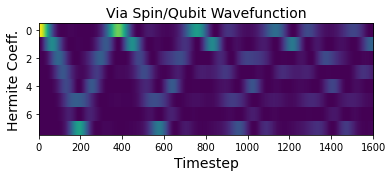

In [136]:

plt.imshow(np.transpose(traj_proc_wfn[:,1:(N+1)].real),cmap='viridis', interpolation='nearest',
                        aspect=Ns/(3*N))
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Hermite Coeff.',fontsize=14)
plt.title('Via Spin/Qubit Wavefunction',fontsize=14)
plt.show()


And convince ourselves that both propagation methods have produced the same result:

In [137]:

err_cm_wfn = np.sum(np.abs(traj_proc_cm[Ns,1:8] - traj_proc_wfn[Ns,1:8]))/N

print(err_cm_wfn)
print(traj_proc_wfn[Ns,1:8].real)
print(traj_proc_cm[Ns,1:8].real)


5.544734337353796e-09
[0.02 0.3  0.   0.07 0.01 0.02 0.  ]
[0.02 0.3  0.   0.07 0.01 0.02 0.  ]


Which is equivalent to the Liouville-von Neumann evolution of the correlation matrix, up to some numerical error due to timestepping and integration methods.  Of course, the spin/qubit problem scales exponentially in $N$, while the Fermionic problem scales as $O(N^2)$, so it is clear which is preferable for classical simulation.

In [138]:
wfn.shape

(256,)

In [139]:
CMi.shape

(8, 8)

<h1>Classical Problem</h1>

As a final step, we verify that direct integration of the "classical" spectral equation,


\begin{equation} 
\frac{d \mathbf{g}_k}{dt} = \mathbf{A} \cdot \mathbf{g}_k \hspace{10pt} \Longrightarrow \hspace{10pt} \mathbf{g}_k(t) = e^{\mathbf{A} t} g_k (0),
\end{equation}

and the exponential propagator give the same result.  We begin by defining $\mathbf{A}$ as described above:

In [140]:
A = -1.0j*H

And setting the intial state to the same occupancy vector that we defined for the quantum problem:

In [141]:

g0   = occ_state / sla.norm(occ_state)

g0_v = vs.vectorize_cvec(g0)


We then solve the classical equation using the derivative defined in `vs.prop_vlasov_classical` via:

In [142]:

traj_g     = spi.odeint(vs.prop_vlasov_classical,g0_v,timestep_vec,args=(A,),atol=1e-16)


As well as applying the exponentiated operator repeatedly,

\begin{equation}
\mathbf{g}_k(t) = \Big(\prod_{j=1}^{t/\delta t} e^{\mathbf{A} t} \Big) g_k (t = 0),
\end{equation}

using the routine,

In [143]:

traj_g_exp = vs.prop_vlasov_exponential(A,g0,dt,Ns)


We then process the trajectory data:

In [144]:
traj_proc_g      = 1j*np.zeros((len(timestep_vec),N+1))
traj_proc_g_exp  = 1j*np.zeros((len(timestep_vec),N+1))

for j, t in enumerate(timestep_vec):
    
    traj_proc_g[j,0]      = t
    traj_proc_g_exp[j,0]  = t
    
    tf_g = traj_g[j,0:N] + 1j*traj_g[j,N:(2*N)]
    traj_proc_g[j,1:(N+1)] = tf_g.conj().T * tf_g
    
    
    tf_g_exp = traj_g_exp[j,:]
    traj_proc_g_exp[j,1:(N+1)] = tf_g_exp.conj().T * tf_g_exp


And make the same plots, and do the same comparative analysis, etc. as above:

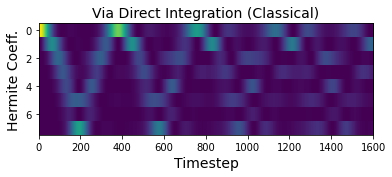

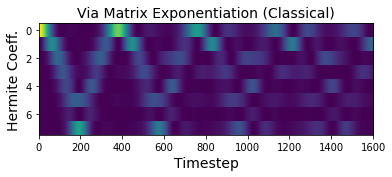

In [145]:
plt.imshow(np.transpose(traj_proc_g[:,1:(N+1)].real),cmap='viridis', interpolation='nearest',
                        aspect=Ns/(3*N))
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Hermite Coeff.',fontsize=14)
plt.title('Via Direct Integration (Classical)',fontsize=14)
#plt.colorbar()
plt.show()

plt.imshow(np.transpose(traj_proc_g_exp[:,1:(N+1)].real),cmap='viridis', interpolation='nearest',
                        aspect=Ns/(3*N))
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Hermite Coeff.',fontsize=14)
plt.title('Via Matrix Exponentiation (Classical)',fontsize=14)
#plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

<h1>Error Analysis</h1>

Below we summarize mean relative error in amplitudes for all of our numerical methods, measured with respect to the midpoint step $N_m = t_{max} / (2 \delta t)$ of a given simulation trajectory.  This is prudent when considering damped evolutions or other circumstances where underflow could be an issue at large timesteps.  

In [146]:

Nm = int(Ns/2)

mean_cm_g    = np.mean(np.abs(traj_proc_cm[Nm,1:8]))
mean_wfn_g   = np.mean(np.abs(traj_proc_wfn[Nm,1:8]))

err_wfn_cm       = np.sum(np.abs(traj_proc_wfn[Nm,1:8]  - traj_proc_cm[Nm,1:8]))/(N*mean_cm_g)
err_cm_g       = np.sum(np.abs(traj_proc_cm[Nm,1:8]  - traj_proc_g[Nm,1:8]))/(N*mean_cm_g)
err_cm_g_exp   = np.sum(np.abs(traj_proc_cm[Nm,1:8]  - traj_proc_g_exp[Nm,1:8]))/(N*mean_cm_g)
err_wfn_exp    = np.sum(np.abs(traj_proc_wfn[Nm,1:8] - traj_proc_g[Nm,1:8]))/(N*mean_wfn_g)
err_wfn_g_exp  = np.sum(np.abs(traj_proc_wfn[Nm,1:8] - traj_proc_g_exp[Nm,1:8]))/(N*mean_wfn_g)


print("\n"*2)
print("="*80)
print("Relative error:")
print("="*80)
print("")
print("Wavefuction vs. LvN: \t\t\t\t",  err_wfn_cm)
print("")
print("\"Classical\" numerical integration vs. LvN: \t",  err_cm_g)
print("\"Classical\" exponential propagator vs. LvN: \t", err_cm_g_exp)
print("")
print("\"Classical\" numerical integration vs. WFN: \t",  err_wfn_exp)
print("\"Classical\" exponential propagator vs. WFN: \t", err_wfn_g_exp)

print("\n"*2)
print("="*80)
print("Final Amplitudes:")
print("="*80)
print("")
print("LvN CM (t=tmax): \t",        traj_proc_cm[Nm,1:8].real)
print("JW WFN (t=tmax): \t",        traj_proc_wfn[Nm,1:8].real)
print("")
print("Direct soln. (t=tmax): \t",  traj_proc_g[Nm,1:8].real)
print("Exp. Prop. (t=tmax): \t",    traj_proc_g_exp[Nm,1:8].real)
print("\n")




Relative error:

Wavefuction vs. LvN: 				 1.4515733525720482e-08

"Classical" numerical integration vs. LvN: 	 1.6807196244251085e-08
"Classical" exponential propagator vs. LvN: 	 5.3909236637151895e-09

"Classical" numerical integration vs. WFN: 	 6.699993938859392e-09
"Classical" exponential propagator vs. WFN: 	 1.4878892562505277e-08



Final Amplitudes:

LvN CM (t=tmax): 	 [2.64e-01 3.02e-01 1.23e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]
JW WFN (t=tmax): 	 [2.64e-01 3.02e-01 1.22e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]

Direct soln. (t=tmax): 	 [2.64e-01 3.02e-01 1.22e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]
Exp. Prop. (t=tmax): 	 [2.64e-01 3.02e-01 1.22e-07 7.40e-02 2.12e-04 2.25e-02 1.64e-03]




We see reasonable numerical agreement between the different methods.

<h1>External Integration</h1>

The Hamiltonians generated for the wavefunction-based propagation can be exported for use with other simulation tools (particuarly those intended for quantum signal processing).  In particular, an auxiliary routine `hamiltonian_wfn_vlasov_hermite_linear_sym_string` from `vlasovsim` can export the terms appearing in the Hamiltonian in a plain text format. :

In [147]:
ham_strings = vs.hamiltonian_wfn_vlasov_hermite_linear_sym_string(k,alpha,nu,N)

ham_strings

[('XXIIIIII', 0.8944271909999159),
 ('YYIIIIII', 0.8944271909999159),
 ('IXXIIIII', 1.0),
 ('IYYIIIII', 1.0),
 ('IIXXIIII', 1.224744871391589),
 ('IIYYIIII', 1.224744871391589),
 ('II+IIIII', -0.02j),
 ('IIIXXIII', 1.4142135623730951),
 ('IIIYYIII', 1.4142135623730951),
 ('III+IIII', -0.03j),
 ('IIIIXXII', 1.5811388300841898),
 ('IIIIYYII', 1.5811388300841898),
 ('IIII+III', -0.04j),
 ('IIIIIXXI', 1.7320508075688772),
 ('IIIIIYYI', 1.7320508075688772),
 ('IIIII+II', -0.05j),
 ('IIIIIIXX', 1.8708286933869707),
 ('IIIIIIYY', 1.8708286933869707),
 ('IIIIII+I', -0.06j),
 ('IIIIIII+', -0.07j)]

This Hamiltonian is provided as a list of tuples, with the first element containing a Pauli string for each term in the Hamiltonian (least-signficiant qubit first) and the second the coefficient associated with that term.  Notation reflects the usual Pauli operators (`X`, `Y`, `Z`, `I`), with the $z$-projectors $P_{Z+} = (I+Z)/2$ and $P_{Z-} =  (I-Z)/2$ given by `+` and `-`, respectively.  Note that  terms containing these projectors  have imaginary coefficients, as they represent the diagonal damping contributions to the Vlasov equation.

A typical problem for practical (gate-based) QSP benchmarks might entail using coefficients with fixed $k$ and $\alpha$ (say $k = 1$ and $\alpha = 0.5$) with no damping ($\nu = 0$), and working at a progressively larger scale of expansion coefficients to set the problem scale / circuit complexity (e.g.,  $N \in \{4, 8, 16, 32, 64, 128, \dots\}$).

<h1>References</h1>

<ol>
    <li>F. G. Grant and M. R. Feix, "Fourier-Hermite Solutions of the Vlasov Equations in the Linearized Limit" <i>Phys. Fluids</i> <b>10</b>, 696 (1967) </li> 
    <li>J. T. Parker and P. J. Dellar, "Fourier-Hermite spectral representation for the Vlasov-Poisson system in the weakly collisional limit." <i>J. Plasma Phys.</i> <b>100</b>, 1 (2015) </li> 
</ol>